In [ ]:
## run matlab from python

In [1]:
import matlab.engine
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cd "D:\git_repo\NET\timeSeriesViewer\dataRecordingObjects\"

D:\git_repo\NET\timeSeriesViewer\dataRecordingObjects


In [3]:
eng = matlab.engine.start_matlab() #the engine is set to the current path

In [4]:
# eng.pwd() # make sure good path

In [5]:
bin_fullpath = r'F:\experiment1_109.raw.bin' #NOTE: meta file shoud be with the bin file at the same folder

In [6]:
bin_obj = eng.binaryRecording(bin_fullpath) #NOTE- if faile - make sure you created eng in the rigth path

In [7]:
startTime_ms = matlab.double([100]) #crate a matlab array (numbers should be doubles)

In [8]:
channels = matlab.double(range(1,2))

In [9]:
matlab_mat_data = eng.getData(bin_obj, channels, startTime_ms, 3600000.0)

In [10]:
py_mat = np.array(matlab_mat_data) #convert the result to python object

In [11]:
py_mat.shape

(1, 1, 72000000)

In [ ]:
# 200000 * (1/20000) 

In [ ]:
# dim explain
# py_mat[x][y][z]
# x- channel (acording to the order given to getData)
# y- start_time (acording to the order given to getData) 
# z- voltage (acording to the window given to getData) 

In [13]:
pc_pymat = py_mat[0][0]

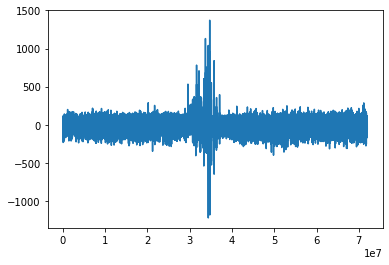

In [14]:
plt.plot(pc_pymat)

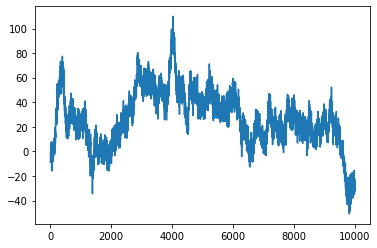

In [42]:
# plt.figure(figsize=(15,5))
plt.plot(pc_pymat[10000:20000])

In [36]:
stochastic_process = [0]
white_noise = []

In [40]:
stochastic_process = [0]
for i in range(10000):
    stochastic_process.append(stochastic_process[-1]+np.random.uniform(low=-1,high=1))
#     stochastic_process.append(stochastic_process[-1]+np.random.randn())

In [ ]:
for i in range(10000):
    white_noise.append(np.random.uniform(low=-1,high=1))

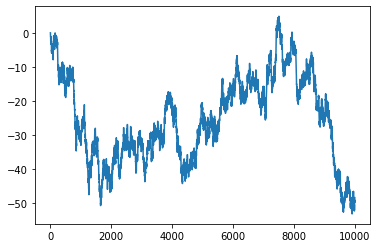

In [41]:
plt.plot(stochastic_process)

In [16]:
from scipy import signal
import matplotlib.pyplot as plt

In [ ]:
pc_pymat.shape

In [ ]:
1200000 / 20000

In [ ]:
sin = np.sin(2*np.pi * np.linspace(0,60,1200000) * 1000 ) * 10

In [ ]:
np.sin

In [ ]:
import librosa

In [ ]:
w,sr =librosa.load(r"C:\Users\ofir1\Desktop\sin.wav",sr=None)

In [45]:
#f, t, Zxx = signal.stft(x, fs, nperseg=1000)
# x = the signal (vector of samples) ; fs = sample rate ; nperseg = window (num of samples)
f, t, Zxx = signal.stft(pc_pymat, 20000, nperseg=200000, noverlap = 180000)


In [48]:
import pickle

In [49]:
# save after sftf- signal.stft(pc_pymat, 20000, nperseg=200000, noverlap = 180000)
filename = 'Zxx'
outfile = open(filename,'wb')
pickle.dump(Zxx,outfile)
outfile.close()
filename = 't'
outfile = open(filename,'wb')
pickle.dump(t,outfile)
outfile.close()
filename = 'f'
outfile = open(filename,'wb')
pickle.dump(f,outfile)
outfile.close()

OverflowError: cannot serialize a bytes object larger than 4 GiB

In [ ]:
# save pure matlab data - startTime_ms = matlab.double([100]) ; channel = 1, window = 3600000
filename = 'mat_data'
outfile = open(filename,'wb')
pickle.dump(pc_pymat,outfile)
outfile.close()

In [61]:
Zxx.shape

(100001, 3601)

In [ ]:
len(t)

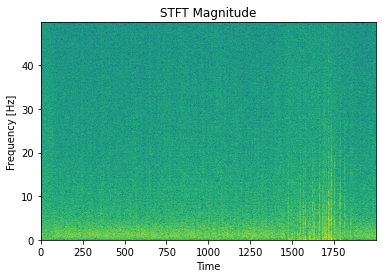

In [63]:
plt.pcolormesh(t[:2000], f[:500], np.log(np.abs(Zxx[:500,:2000])), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time')
plt.show()

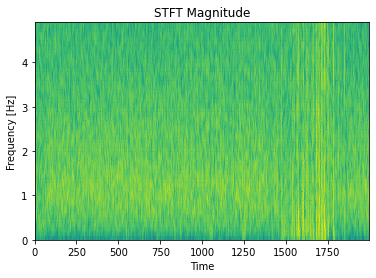

In [64]:
plt.pcolormesh(t[:2000], f[:50], np.log(np.abs(Zxx[:50,:2000])), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time')
plt.show()

In [ ]:
from scipy.signal import butter,filtfilt
order = 100
# Filter requirements.
T = 5.0         # Sample Period
fs = 20000.0       # sample rate, Hz
cutoff = 2      # desired cutoff frequency of the filter, Hz ,slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency

normal_cutoff = cutoff / nyq
b, a = butter(order, normal_cutoff, btype='low', analog=False)
y = filtfilt(b, a, pc_pymat)

In [ ]:
f, t, Zxx = signal.stft(pc_pymat, 20000, nperseg=30000)
plt.pcolormesh(t, f[:], np.log(np.abs(Zxx[:,])), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time')
plt.show()

In [ ]:
np.abs(Zxx[:,]).shape

In [ ]:
# analyze

In [20]:
from sklearn.cluster import KMeans

In [ ]:
X.shape

In [105]:
X = np.abs(Zxx[:500,]) #data matrix- until 50Hz
X_t = np.transpose(X)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_t) 

In [106]:
lables = kmeans.labels_ 

In [67]:
# lables

array([0, 0, 4, ..., 4, 4, 4])

In [119]:
indxes = np.where(lables == 2)

In [120]:
sub_X = X_t[indxes[0],:]

In [116]:
# lables

In [121]:
sub_X.shape[0]

2019

In [111]:
# Zxx.shape

In [112]:
# min(sub_X[0])

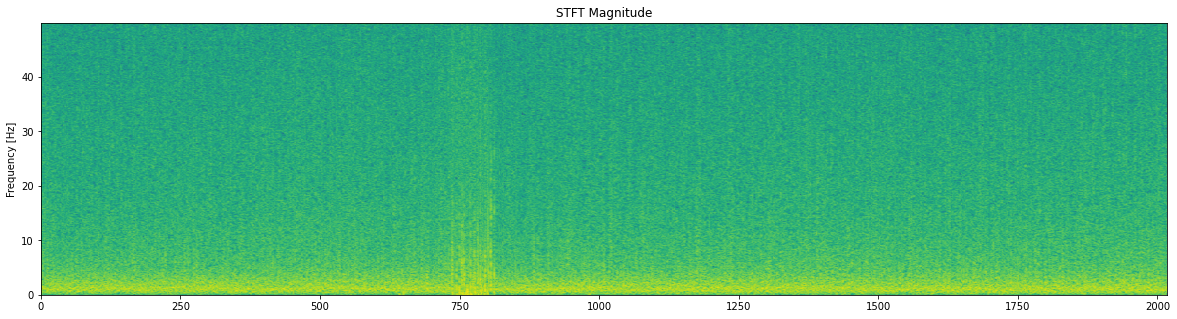

In [122]:
plt.figure(figsize=(sub_X.shape[0] / 100 ,5))
plt.pcolormesh(t[:sub_X.shape[0]], f[:500], np.log(np.transpose(sub_X)), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time')
plt.show()

In [ ]:
plt.pcolormesh(t[:223], f[:50], (np.transpose(sub_X)), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time')
plt.show()

In [ ]:
# >>> kmeans.labels_
# array([1, 1, 1, 0, 0, 0], dtype=int32)
# >>> kmeans.predict([[0, 0], [12, 3]])
# array([1, 0], dtype=int32)
# >>> kmeans.cluster_centers_
# array([[10.,  2.],
#        [ 1.,  2.]])